#Import library

In [322]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import set_config

#Import data

In [323]:
prices=pd.read_csv('sample_data/prices.csv')
prices

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


#Sampling Google from datasets

In [324]:
prices=prices[prices['symbol']=='GOOG']
prices

,date,symbol,open,close,low,high,volume
439,2010-01-04,GOOG,626.951088,626.751061,624.241073,629.511067,3927000.0
907,2010-01-05,GOOG,627.181073,623.991055,621.541045,627.841071,6031900.0
1375,2010-01-06,GOOG,625.861078,608.261023,606.361042,625.861078,7987100.0
1843,2010-01-07,GOOG,609.401025,594.101005,592.651008,610.001045,12876600.0
2311,2010-01-08,GOOG,592.000997,602.021036,589.110988,603.251034,9483900.0
...,...,...,...,...,...,...,...
848963,2016-12-23,GOOG,790.900024,789.909973,787.280029,792.739990,623400.0
849463,2016-12-27,GOOG,790.679993,791.549988,787.656982,797.859985,789100.0
849963,2016-12-28,GOOG,793.700012,785.049988,783.200012,794.229980,1132700.0
850463,2016-12-29,GOOG,783.330017,782.789978,778.919983,785.929993,742200.0


#Data preprocessing

In [325]:
prices = prices.drop(['symbol'], axis=1)
prices

,date,open,close,low,high,volume
439,2010-01-04,626.951088,626.751061,624.241073,629.511067,3927000.0
907,2010-01-05,627.181073,623.991055,621.541045,627.841071,6031900.0
1375,2010-01-06,625.861078,608.261023,606.361042,625.861078,7987100.0
1843,2010-01-07,609.401025,594.101005,592.651008,610.001045,12876600.0
2311,2010-01-08,592.000997,602.021036,589.110988,603.251034,9483900.0
...,...,...,...,...,...,...
848963,2016-12-23,790.900024,789.909973,787.280029,792.739990,623400.0
849463,2016-12-27,790.679993,791.549988,787.656982,797.859985,789100.0
849963,2016-12-28,793.700012,785.049988,783.200012,794.229980,1132700.0
850463,2016-12-29,783.330017,782.789978,778.919983,785.929993,742200.0


In [326]:
prices = prices[prices['open'] < 1050]
prices = prices[prices['close'] < 1050]
prices = prices[prices['high'] < 1050]
prices = prices[prices['low'] < 1060]
prices = prices[prices['volume'] < 1.01*1e7]
prices

,date,open,close,low,high,volume
439,2010-01-04,626.951088,626.751061,624.241073,629.511067,3927000.0
907,2010-01-05,627.181073,623.991055,621.541045,627.841071,6031900.0
1375,2010-01-06,625.861078,608.261023,606.361042,625.861078,7987100.0
2311,2010-01-08,592.000997,602.021036,589.110988,603.251034,9483900.0
3247,2010-01-12,597.651011,590.481036,588.001007,598.161034,9742900.0
...,...,...,...,...,...,...
848963,2016-12-23,790.900024,789.909973,787.280029,792.739990,623400.0
849463,2016-12-27,790.679993,791.549988,787.656982,797.859985,789100.0
849963,2016-12-28,793.700012,785.049988,783.200012,794.229980,1132700.0
850463,2016-12-29,783.330017,782.789978,778.919983,785.929993,742200.0


In [327]:
prices['date']=pd.to_datetime(prices['date'])
prices.dtypes

date      datetime64[ns]
open             float64
close            float64
low              float64
high             float64
volume           float64
dtype: object

#Train Test Split

In [328]:
X=prices[['volume','open', 'high', 'low']]
y=prices['close']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=False, random_state=42)

#Model Creation

###Basic Linear regression model

In [329]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,y_train)
predict = lin_reg_model.predict(X_test)

accuracy = lin_reg_model.score(X_test, y_test)
r2 = np.round(metrics.r2_score(y_test, predict),3)

print("(R^2) score: ", r2)
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

(R^2) score:  0.999
Accuracy: 99.61 %.


###Random Forest

In [330]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
rand_forest_model = RandomForestRegressor(n_estimators=50, random_state=42, max_depth=3)
rand_forest_model.fit(X_train, y_train)
predict = rand_forest_model.predict(X_test)

print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

(R^2) Score: 0.9704
Accuracy: 98.04 %.


### K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


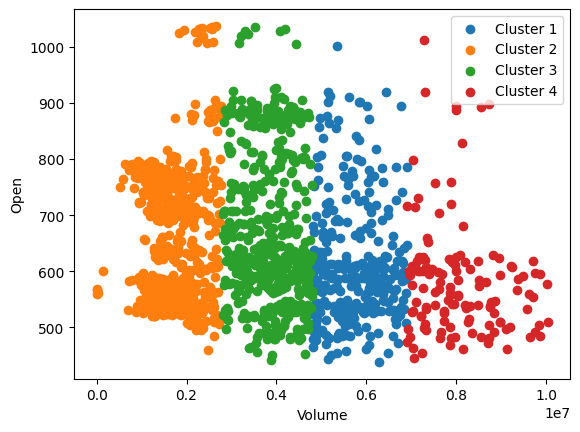

In [331]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

num_clusters = 4

kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X)

prices['Cluster'] = kmeans.labels_

for cluster in range(num_clusters):
    cluster_data = prices[prices['Cluster'] == cluster]
    plt.scatter(cluster_data['volume'], cluster_data['open'], label=f'Cluster {cluster + 1}')

plt.xlabel('Volume')
plt.ylabel('Open')
plt.legend()
plt.show()


###LSTM

In [332]:
X= prices[['open','high']]
y= prices['close']
length=100
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False, random_state=42)
training_set = X.iloc[:1000].values
test_set = X.iloc[1000:].values
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled=sc.transform(test_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(length, len(training_set)):
    X_train.append(training_set_scaled[i-length:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = []
y_test = []
for i in range(length, len(test_set)):
    X_test.append(test_set_scaled[i-length:i, 0])
    y_test.append(test_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [333]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs = 100, batch_size = 32)

Epoch 1/100
29/29 [==============================] - 52s 324ms/step - loss: 0.0343 - val_loss: 0.0057
Epoch 2/100
29/29 [==============================] - 8s 280ms/step - loss: 0.0127 - val_loss: 0.0031
Epoch 3/100
29/29 [==============================] - 7s 250ms/step - loss: 0.0121 - val_loss: 0.0020
Epoch 4/100
29/29 [==============================] - 7s 239ms/step - loss: 0.0115 - val_loss: 0.0018
Epoch 5/100
29/29 [==============================] - 7s 237ms/step - loss: 0.0094 - val_loss: 0.0018
Epoch 6/100
29/29 [==============================] - 7s 252ms/step - loss: 0.0086 - val_loss: 0.0016
Epoch 7/100
29/29 [==============================] - 7s 226ms/step - loss: 0.0085 - val_loss: 0.0015
Epoch 8/100
29/29 [==============================] - 7s 261ms/step - loss: 0.0070 - val_loss: 0.0020
Epoch 9/100
29/29 [==============================] - 6s 207ms/step - loss: 0.0069 - val_loss: 0.0015
Epoch 10/100
29/29 [==============================] - 7s 259ms/step - loss: 0.0064 - val_l

In [334]:
pred=model.predict(X_test)
test=pd.DataFrame(columns=['test','pred'])
test['test']=y_test
test['pred']=pred.flatten()
test

17/17 [==============================] - 3s 65ms/step


,test,pred
0,0.154980,0.178074
1,0.154713,0.173496
2,0.148253,0.169887
3,0.139924,0.166672
4,0.158184,0.162570
...,...,...
517,0.588511,0.602824
518,0.588144,0.600511
519,0.593184,0.598633
520,0.575876,0.599367


Text(500, 1.25, 'Mean Absolute error : 0.0')

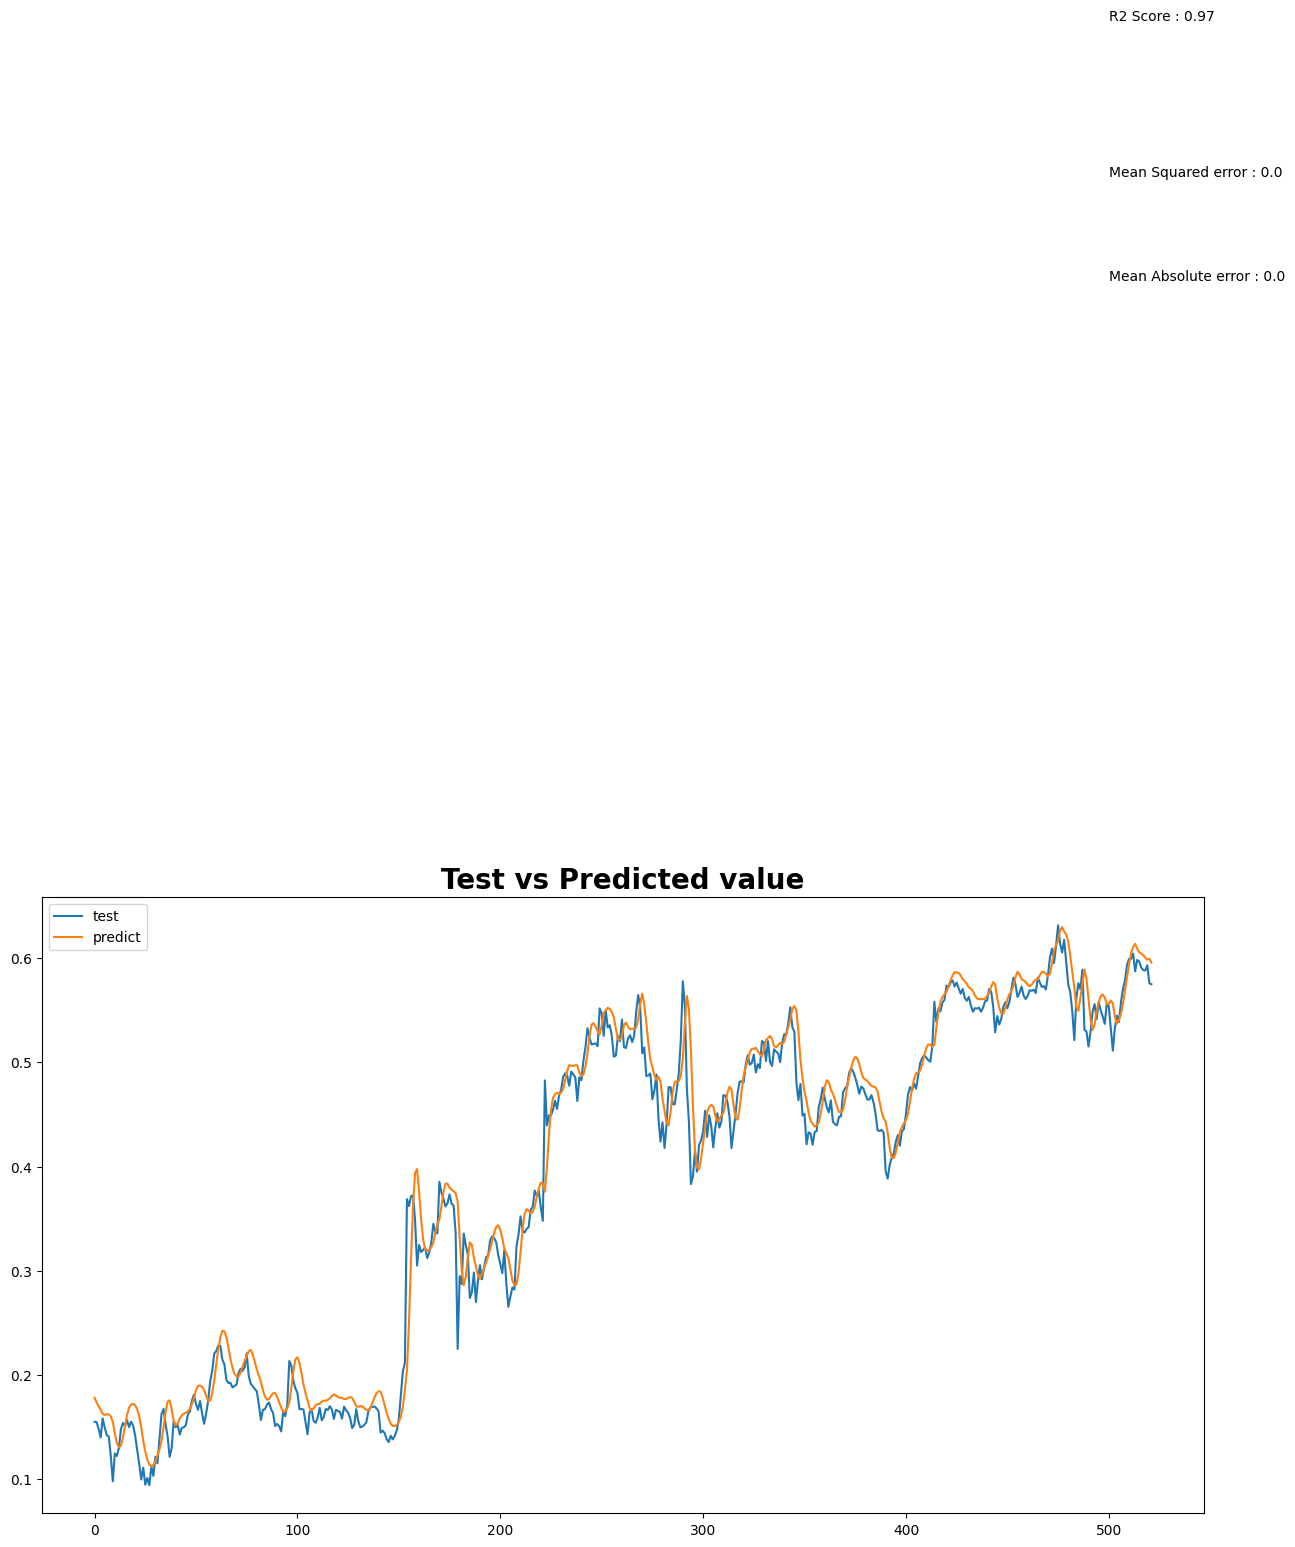

In [335]:
fig=plt.figure(figsize=(15,8))
plt.title("Test vs Predicted value", size=20, weight='bold')
plt.plot(test)
plt.legend(['test','predict'])
r2=np.round(r2_score(y_test,pred),2)
mse=np.round(mean_squared_error(y_test,pred),2)
mae=np.round(mean_squared_error(y_test,pred),2)
plt.text(x=500, y=1.5,s='R2 Score : {}'.format(r2))
plt.text(x=500, y=1.35,s='Mean Squared error : {}'.format(mse))
plt.text(x=500, y=1.25,s='Mean Absolute error : {}'.format(mae))

In [336]:
r2=np.round(metrics.r2_score(y_test,pred),2)
print("R^2 score:", r2)

R^2 score: 0.97
